In [ ]:
### IMPORT STATEMENTS ###

from __future__ import print_function
from inputs import get_gamepad
from IPython.display import clear_output
from wireless import Wireless
from time import sleep
from subprocess import Popen, STDOUT, PIPE, DEVNULL
import pywinauto
from pywinauto.application import Application
from pywinauto.win32functions import SetForegroundWindow
import numpy as np
import matplotlib.pyplot as plt
import math

we found a gamepad.


Entered Scan
False
False
False
False
False
False
False
Found First $
True
58,29.7,2.21

58
1.0122909661567112
29.7
202.21
True
132,31.0,5.8

132
2.303834612632515
31.0
1505.8
True
140,65.2,1.92

140
2.443460952792061
65.2
201.92
Found Last $
--------------------------------cyBOT VISION------------------------------
[(1.0122909661567112, 29.7, 202.21), (2.303834612632515, 31.0, 1505.8), (2.443460952792061, 65.2, 201.92)]


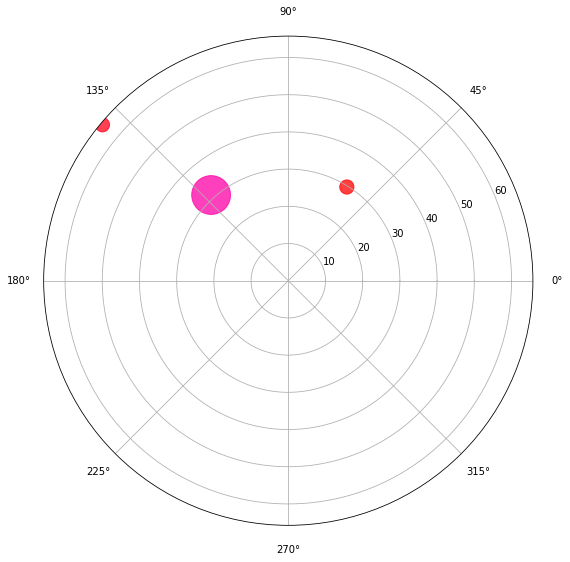

----------------------------"cyBOT 9" INFO-------------------------------
|
| Error State
| (Clear : 0) (Left Bumper : 1) (Right Bumper : 2) (Cliff : 3) (Edge :4)
| Current State: u
|
------------------------------MOVEMENT MENU-------------------------------
|
| Right Trigger: SCAN
| Y Button: FORWARD
| Down Arrow: MOVE BACK
| X Button: TURN LEFT
| B Button: TURN RIGHT
| Left Trigger: FINISH
|
| Enter action:


In [ ]:
### GLOBAL VARIABLES ###

#Used to tell if the current button data set is different 
#   than the last.
buttonFlag = 0

#Xbox 1 controller buttons. Turns True when
#   pressed and false otherwise.
A_button = False
B_button = False
X_button = False
Y_button = False
TR_button = False
BACK_button = False
W_button = False

#Status of WiFi connection.
WiFi_Status = False

#Network the GUI is connected to.
WiFi_Network = ""

#WiFi object.
Network = 0

#Putty application instance.
Putty = 0

#Error # recieved from the Bot.
Error_State = 0

#Array to hold the values for the graph
Scan_Data = []



### FUCNTIONS ###



#Cycles through the objects data to check if a button has been pressed.
def checkButton():
    
    #Defines Global Variables. Does not Declare
    global buttonFlag
    global A_button
    global B_button
    global X_button
    global Y_button
    global TR_button
    global BACK_button
    global W_button
    
    #Gathers the current information from the Xbox 1 Controller.
    events = get_gamepad()
    
    A_button = False
    B_button = False
    X_button = False
    Y_button = False
    TR_button = False
    BACK_button = False
    W_button = False
    
    #Cycles through the objects data to check for desired 
    #   button presses.
    for event in events:
        
        #print(event.code, event.state)
        
        #Checks if button 'Y' was pressed.
        if((event.code == "BTN_NORTH") and (event.state == 1)):
            #print(event.code, event.state)
            Y_button = True
            buttonFlag = 1

        #Checks if button 'B' was pressed.
        elif((event.code == "BTN_EAST") and (event.state == 1)):
            #print(event.code, event.state)
            B_button = True
            buttonFlag = 1

        #Checks if button 'A' was pressed.
        elif((event.code == "BTN_SOUTH") and (event.state == 1)):
            #print(event.code, event.state)
            A_button = True
            buttonFlag = 1

        #Checks if button 'X' was pressed.
        elif((event.code == "BTN_WEST") and (event.state == 1)):
            #print(event.code, event.state)
            X_button = True
            buttonFlag = 1
            
        #Checks if Right Trigger was pressed.
        elif((event.code == "BTN_TR") and (event.state == 1)):
            #print(event.code, event.state)
            TR_button = True
            buttonFlag = 1
        
        #Checks if down arrow was pressed.
        elif((event.code == "ABS_HAT0Y") and (event.state == 1)):
            #print(event.code, event.state)
            BACK_button = True
            buttonFlag = 1
        
        #Checks if Left Trigger was pressed.
        elif((event.code == "BTN_TL") and (event.state == 1)):
            #print(event.code, event.state)
            W_button = True
            buttonFlag = 1
            
        else:
            buttonFlag = 0

#Walks the user through the WiFi connection process.
def WiFi_Setup():
    
    global buttonFlag
    global A_button
    global WiFi_Network
    global WiFi_Status
    
    print('\033[1m' + "-------------------WiFi MENU--------------------" + '\033[0m')
    print("|")
    print("| Enter Bot Number : ")
    Bot_Number = int(input())
    WiFi_Name = str(""""cyBOT """ +str(Bot_Number) +str('"'))
    connect_to_network(WiFi_Name)
    
    WiFi_Network = WiFi_Name
    WiFi_Status = True
    
    print("| WiFi Connected to :" + str(WiFi_Name))
    print('\033[1m' + "----------------------------------------------------" + '\033[0m')
    print("|")
    print("| Press A to Continute")
    print("|")
    print('\033[1m' + "----------------------------------------------------" + '\033[0m')
    
    #Waits until user selects option.
    while(buttonFlag == 0):
        checkButton()
        if(A_button):
            clear_output()
            A_button = False
            buttonFlag = 0
            break
        else:
            buttonFlag = 0
        
            
            
#Connects the the desired WiFi network.         
def connect_to_network(name):
    
    global Network
    global Putty
    
    Network = Popen('netsh wlan connect ' + str(name), shell=True, stdout=PIPE, stderr=STDOUT, stdin=PIPE)
    
    password = "PrawnStars"
    Network.stdin.write(password.encode('utf-8'))
    Network.stdin.write(b"\n")
    
    sleep(2)
    #Putty = Application(backend="uia").start('putty.exe -load WiFi')
    

        
        
#Sends out character to BOT via WiFi.
def WiFi_Send(Action):
    
    global Network
    
    clear_output()
    
    print("|-----------------------------------------------")
    print("|")
    print("| Sending: " + str(Action))
    print("|")
    
    if(Action == "SCAN"):
        pywinauto.keyboard.SendKeys('{s}')
        pywinauto.keyboard.SendKeys('{ENTER}')
        
    elif(Action == "MOVE FORWARD"):
        pywinauto.keyboard.SendKeys('{w}')
        pywinauto.keyboard.SendKeys('{ENTER}')
        
    elif(Action == "TURN LEFT"):
        pywinauto.keyboard.SendKeys('{a}')
        pywinauto.keyboard.SendKeys('{ENTER}')
        
    elif(Action == "TURN RIGHT"):
        pywinauto.keyboard.SendKeys('{d}')
        pywinauto.keyboard.SendKeys('{ENTER}')
    
    elif(Action == "MOVE BACKWARD"):
        pywinauto.keyboard.SendKeys('{x}')
        pywinauto.keyboard.SendKeys('{ENTER}')
    
    elif(Action == "FINISH"):
        pywinauto.keyboard.SendKeys('{q}')
        pywinauto.keyboard.SendKeys('{ENTER}')
        
    Action = ""
    


#Receives data via wifi from BOT.
def WiFi_Receive_Scan(Action):
    
    global Error_State
    global Scan_Data
    
    Parse_Signal = False
    
    file = open("input.txt", "r")

    print("Entered Scan")
    
    for line in file:
        
        if(('$' in line) and (Parse_Signal == True)):
            Parse_Signal = False
            print("Found Last $")
            file.close()
            #open("input.txt", 'w').close()
            break
            
        print(Parse_Signal)
        
        if(Parse_Signal):

            print(line)

            degree, iR, LW = line.strip().split(",")

            Radians = float(degree)

            AvgDis = float(iR)

            Linear_Width = float(LW)

            Radians = math.radians(Radians)

            if(Linear_Width < 5):
                Linear_Width = Linear_Width + 200

            elif(Linear_Width > 5):
                Linear_Width = Linear_Width + 1500

            print(degree)
            print(Radians)
            print(AvgDis)
            print(Linear_Width)

            Scan_Data.append(( Radians, AvgDis, Linear_Width ))

        elif('$' in line):
            Parse_Signal = True
            print("Found First $")
    
    file.close()
    #open("input.txt", 'w').close()
            
            
#Receives data via wifi from BOT.
def WiFi_Receive_Char(Action):
    
    global Error_State
    
    Parse_Signal = False
    
    file = open("input.txt", "r")

    for line in file:
        
        #Updates to the latest state.
        Error_State = line
        
    file.close()
    #open("input.txt", 'w').close()
        

    
    
#MAIN LOOP 
#   Passively watches the COM ports for information.
#   When detected, reads in the event and its attributes.
def main():
    
    #Defines Global Variables. Does not Declare, buts grants access to the global vars.
    global buttonFlag
    global A_button
    global B_button
    global X_button
    global Y_button
    global TR_button
    global BACK_button
    global W_button
    
    global WiFi_Status
    global WiFi_Network
    global My_Turn
    
    global Error_State
    global Scan_Data
    
    
    
    
    #RUNS THROUGH SETUP MENU.
    
    
    
    menuComplete = False
    
    while(menuComplete == False):
        
        print('\033[1m' + "----------------Current Settings----------------" + '\033[0m')
        print("|")
        print("| Connection Status: " + '\033[1m' +  str(WiFi_Status) + '\033[0m')
        print("| Network Name: " + '\033[1m' +  str(WiFi_Network) + '\033[0m')
        print("|")
        print('\033[1m' + "------------------------------------------------" + '\033[0m')
        print("|")
        print("| Press Y to setup WiFi.")
        print("| Press A to confirm settings.")
        print("| ")
        print('\033[1m' + "------------------------------------------------" + '\033[0m')
        
        #Waits until user selects option.
        while(buttonFlag == 0):
            checkButton()
        
        #Resets the Status Flag.
        buttonFlag = 0
        
        clear_output()
        
        #Checks buttons
        if(Y_button):
            WiFi_Setup()
            Y_button = False
        elif(A_button):
            A_button = False
            menuComplete = True
        else:
            buttonFlag = 0
        
        clear_output()
        
    
    
    
    #STARTS WIFI COMMUNICATION WITH BOT.
    
    
    
    programCounter = 0
    
    programComplete = False
    Action = ""
    
    while(programComplete == False):    
            
        clear_output()
        
        
        if(Action == "SCAN"):
            
            #Pauses python to give time for robot to scan and send back info.
            sleep(7)
        
            WiFi_Receive_Scan(Action)
        
            print('\033[1m' + "--------------------------------cyBOT VISION------------------------------" + '\033[0m')
            
            print(Scan_Data)
            #sleep(10)
            
            
            theta, r, LW = zip(*Scan_Data)
            
            #print(Scan_Data)
            #print("Theta values: " + str(theta))
            #print("Dsitance values: " + str(r))
            #print("Linear Width values: " + str(LW))
            
            #Colors assignment.
            colors = theta
            
            fig = plt.figure()
            fig.set_figheight(9)
            fig.set_figwidth(9)
            ax = fig.add_subplot(111, polar=True)
            c = ax.scatter(theta, r, c=colors, s=LW, cmap='hsv', alpha=0.75)

            plt.show()
            
            Scan_Data = []
        
        
        print('\033[1m' + "----------------------------"+ str(WiFi_Network) + " INFO-------------------------------" + '\033[0m')
        print("|")
        print("| Error State")
        print("| (Clear : 0) (Left Bumper : 1) (Right Bumper : 2) (Cliff : 3) (Edge :4)")
        print("| Current State: " + '\033[1m' + str(Error_State) + '\033[0m')
        print("|")
    
        print('\033[1m' + "------------------------------MOVEMENT MENU-------------------------------" + '\033[0m')
        print("|")
        print("| Right Trigger: SCAN")
        print("| Y Button: FORWARD")
        print("| Down Arrow: MOVE BACK")
        print("| X Button: TURN LEFT")
        print("| B Button: TURN RIGHT")
        print("| Left Trigger: FINISH")
        print("|")
        
        actionComplete = False
        Action = ""
        
        while(actionComplete == False):
            print("| Enter action:")
            
            #Waits until user selects option.
            while(buttonFlag == 0):
                checkButton()
                if(TR_button):
                    Action = "SCAN"
                    buttonFlag = 0
                    TR_button = False
                    break
                elif(X_button):
                    Action = "TURN LEFT"
                    buttonFlag = 0
                    X_button = False
                    break
                elif(Y_button):
                    Action = "MOVE FORWARD"
                    buttonFlag = 0
                    Y_button = False
                    break
                elif(B_button):
                    Action = "TURN RIGHT"
                    buttonFlag = 0
                    B_button = False
                    break
                elif(BACK_button):
                    Action = "MOVE BACKWARD"
                    buttonFlag = 0
                    break
                elif(W_button):
                    Action = "FINISH"
                    buttonFlag = 0
                    break
                elif(A_button):
                    Action = ""
                    buttonFlag = 0
                    break
                else:
                    buttonFlag = 0
                    
                
            print("| Action to perform: " + str(Action))
            print("|")
            print('\033[1m' + "---------------------------------------------------------------------------" + '\033[0m')
            print("|")
            print("| Press A to confirm and send.")
            print("| Press B to set new action.")
        
            #Waits until user selects option.
            while(buttonFlag == 0):
                checkButton()
                if(A_button):
                    A_button = False
                    buttonFlag = 0
                    actionComplete = True
                    WiFi_Send(Action)
                    break
                elif(B_button):
                    buttonFlag = 0
                    B_button = 0
                    break
                else:
                    buttonFlag = 0
    
        
        WiFi_Receive_Char(Action)
    

#This waits the for the controller is initalize and send its
#   call in value. (Waits for it to start)
if __name__ == "__main__":
   main()